In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

#Visualization Tools

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# AI Workflow Module
from model_classifier import ModelClassifier, CustomClassifier

# Models

from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import make_pipeline

from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.feature_selection import ColumnSelector
from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import plot_learning_curves

import matplotlib.gridspec as gridspec
import itertools

# Use for saving model 
import joblib

# Environment Parameters

plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['figure.dpi'] = 100 
plt.rcParams['figure.subplot.hspace'] = 0.75 

plt.style.use('ggplot')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
train_df = pd.read_csv('../data/TCGA-SKCM_train_unresampled_v0.csv',index_col=0)
train_df.head()

,sample_type,weight,height,bmi,age_at_index,A1BG,A2M,NAT1,NAT2,RP11-986E7.7,AADAC,AAMP,AANAT,AARS,ABAT,ABCA1,ABCA2,ABCA3,ABCB7,ABCF1,ABCA4,ABL1,AOC1,ABL2,ABO,ABR,ACAA1,ACACA,ACACB,ACADL,ACADM,ACADS,ACADSB,ACADVL,ACAT1,ACAT2,ASIC2,ASIC1,ACHE,ACLY,ACO1,ACR,ACO2,ACOX1,ACP1,ACP2,ACP5,ACPP,ACRV1,ACTA1,ACTA2,ACTG1,ACTG1.1,ACTC1,ACTG1.2,ACTG1.3,ACTG2,ACTN4,ACTL6A,ACTN1,ACTN2,ACTN3,ACVR1,ACVR1B,ACVR2A,ACVR2B,ACVRL1,ACY1,ACYP1,ACYP2,ADA,ADAM8,ADAM10,ADAR,ADARB1,ADARB2,ADCY1,ADCY2,ADCY3,ADCY5,ADCY6,ADCY7,ADCY8,ADCY9,ADCYAP1,ADCYAP1R1,ADD1,ADD2,ADD3,PLIN2,ADH1A,ADH1B,ADH1C,ADH4,ADH5,ADH6,ADH7,ADK,ADM,ADORA1,ADORA2A,ADORA2B,ADORA3,ADPRH,PARP1,PARP4,ADRA1D,ADRA1B,ADRA1A,ADRA2A,ADRA2B,ADRA2C,ADRB1,ADRB2,ADRB3,ADRBK1,ADRBK2,ADSL,ADSS,AP2A1,AP2A2,AP1B1,AP2B1,AP1G1,AEBP1,AES,AFG3L1P,AFM,AFP,AGA,ACAN,AGER,AGL,AGRP,JAG1,AGT,AGTR1,AGTR2,APLNR,AGXT,NR0B1,AHCY,AHR,AHSG,AIF1,AIM1,AK1,RP4-592A1.2,AK4,AKT1,AKT2,ALAD,ALAS1,ALAS2,ALB,ALCAM,ABCD1,ALDH1A1,ALDH2,ALDH3A1,ALDH1B1,ALDH1A3,ALDH3B1,ALDH3B2,ALDH9A1,ALDH3A2,ABCD2,ALDOA,ALDOB,ALDOC,AKR1B1,ALK,ALOX12,ALOX5,ALOX5AP,ALOX12B,ANXA8L2,ANXA8L2.1,ALOX15,ALOX15B,ALPI,ALPL,ALPP,ALPPL2,ALX3,AMBN,AMBP,AMD1,AMELX,AMELY,AMFR,AMH,AMHR2,AMPD1,AMPD2,AMPD3,AMPH,BIN1,AMT,AMY1A,AMY2A,AMY2B,AMY2B.1,ANG,ANGPT1,ANGPT2,ANK1,ANK2,ANK3,ANPEP,SLC25A4,SLC25A5,SLC25A6,ANXA1,ANXA2,ANXA2P2,ANXA3,ANXA4,ANXA5,ANXA6,ANXA7,ANXA11,ANXA13,AOAH,AOC2,AOX1,APAF1,NUDT2,APOF,APBA1,APBA2,APBB1,APBB2,APC,APCS,AIRE,APEH,APEX1,BIRC2,BIRC3,RP11-566F5.1,BIRC5,APLP1,APLP2,APOA1,APOA2,APOA4,APOB,APOC1,APOC1P1,...,RP4-740C4.6,RP11-67L2.2,FAM47E,CCDC152,ZNF737,URAHP,HSFX2,SNAP47.2,SNAP47.3,CCDC166,C17orf107,RP11-193H5.1,LINC00552,CECR7,NFYC-AS1,LINC00910,CXorf64,AC074286.1,CECR5-AS1,LRRC70,LRRC69,SPON2.2,SPON2.3,PSORS1C3,SMIM6,SYCE1L,C7orf72,BSPH1,TSTD1,CCDC183-AS1,TMEM194B,SP9,LINC00893,CD300LD,DBIL5P,AC016629.8,FAM83A-AS1,LINC00271,UBE2DNL,ZNF717,FAM196B,RRN3P3,FAM66E,AC009501.4,NPIPB5.2,NPIPB5.3,TEKT4P2,CLUHP3,KRTAP4-9,GAGE12J.20,GAGE12J.21,GAGE12J.22,GAGE12J.23,GAGE12J.24,NBPF10,FCGR1B,KRTAP4-7,CYP4F30P,DCAF13P3,RP11-169L17.5,PMS2P5.2,PMS2P5.3,FAM66D,FAM182B.3,FAM182B.4,FAM182B.5,GOLGA8EP,GOLGA8EP.1,FAM95B1,FAM182B.6,FAM182B.7,FAM182B.8,UBE2Q2P2,UBE2Q2P2.1,SPANXB2,FAM66A,LINC00240,SBF1P1,MRPL23-AS1,LINC01134,RP11-273G15.2,AC129778.2,UXT-AS1,AC016700.5,MAP3K14-AS1,JHDM1D-AS1,LINC01119,Z97634.3,NDUFB2-AS1,UBE2Q2P2.2,UBE2Q2P2.3,TEN1,POLR2J3.6,POLR2J3.7,POLR2J3.8,C17orf99,CHKB-AS1,LINC00930,KLLN,RNU4ATAC,SCARNA9.2,SCARNA9.3,SRRM5,C19orf69,C17orf96,PRICKLE4.2,PRICKLE4.3,LINC00426,LINC00092,DNMBP-AS1,DCTN1-AS1,RAMP2-AS1,TPT1-AS1,RP11-474D1.3,C5orf52,C2CD4D,ZFHX4-AS1,XXbac-B476C20.17,LINC00704,PCED1B-AS1,RP11-834C11.6,RP11-834C11.7,CTC-308K20.1,RP5-1068E13.7,ARHGEF33,AL121656.5,CTD-2547E10.2.2,CTD-2547E10.2.3,MEF2B,CMC4,LINC00894,BCDIN3D-AS1,LINC00173,ANKRD66,ULK4P1,WASH2P.6,WASH2P.7,WASH2P.8,FRG2C,ZNF605,RP11-55K22.5,RASAL2-AS1,LINC00882,FTX,TICAM2.2,TICAM2.3,SLC25A5-AS1,ajcc_pathologic_stage_Stage 0,ajcc_pathologic_stage_Stage I,ajcc_pathologic_stage_Stage IA,ajcc_pathologic_stage_Stage IB,ajcc_pathologic_stage_Stage II,ajcc_pathologic_stage_Stage IIA,ajcc_pathologic_stage_Stage IIB,ajcc_pathologic_stage_Stage IIC,ajcc_pathologic_stage_Stage III,ajcc_pathologic_stage_Stage IIIA,ajcc_pathologic_stage_Stage IIIB,ajcc_pathologic_stage_Stage IIIC,ajcc_pathologic_stage_Stage IV,tumor_stage_stage 0,tumor_stage_stage i,tumor_stage_stage ia,tumor_stage_stage ib,tumor_stage_stage ii,tumor_stage_stage iia,tumor_stage_stage iib,tumor_stage_stage iic,tumor_stage_stage iii,tumor_stage_stage iiia,tumor_stage_stage iiib,tumor_stage_stage iiic,tumor_stage_stage iv,ajcc_pathologic_t_T1,ajcc_pathologic_t_T1a,ajcc_pathologic_t_T1b,ajcc_pathologic_t_T2,ajcc_pathologic_t_T2a,ajcc_pathologic_t_T2b,ajcc_pathologic_t_T3,ajcc_pathologic_t_T3a,ajcc_pathologic_t_T3b,ajcc_pathologic_t_T4,ajcc_pathologic_t_T4a,ajcc_pathologic_t_T4b,ajcc_pathologic_t_TX,ajcc_pathologic_t_Tis,ajcc_pathologic_n_N1,ajcc_pathologic_n_N1a,ajcc_pathologic_n_N1b,ajcc_pathologic_n_N2,ajcc_pathologic_n_N

In [3]:
test_df = pd.read_csv('../data/TCGA-SKCM_test_unresampled_v0.csv',index_col=0)
test_df.head()

,sample_type,weight,height,bmi,age_at_index,A1BG,A2M,NAT1,NAT2,RP11-986E7.7,AADAC,AAMP,AANAT,AARS,ABAT,ABCA1,ABCA2,ABCA3,ABCB7,ABCF1,ABCA4,ABL1,AOC1,ABL2,ABO,ABR,ACAA1,ACACA,ACACB,ACADL,ACADM,ACADS,ACADSB,ACADVL,ACAT1,ACAT2,ASIC2,ASIC1,ACHE,ACLY,ACO1,ACR,ACO2,ACOX1,ACP1,ACP2,ACP5,ACPP,ACRV1,ACTA1,ACTA2,ACTG1,ACTG1.1,ACTC1,ACTG1.2,ACTG1.3,ACTG2,ACTN4,ACTL6A,ACTN1,ACTN2,ACTN3,ACVR1,ACVR1B,ACVR2A,ACVR2B,ACVRL1,ACY1,ACYP1,ACYP2,ADA,ADAM8,ADAM10,ADAR,ADARB1,ADARB2,ADCY1,ADCY2,ADCY3,ADCY5,ADCY6,ADCY7,ADCY8,ADCY9,ADCYAP1,ADCYAP1R1,ADD1,ADD2,ADD3,PLIN2,ADH1A,ADH1B,ADH1C,ADH4,ADH5,ADH6,ADH7,ADK,ADM,ADORA1,ADORA2A,ADORA2B,ADORA3,ADPRH,PARP1,PARP4,ADRA1D,ADRA1B,ADRA1A,ADRA2A,ADRA2B,ADRA2C,ADRB1,ADRB2,ADRB3,ADRBK1,ADRBK2,ADSL,ADSS,AP2A1,AP2A2,AP1B1,AP2B1,AP1G1,AEBP1,AES,AFG3L1P,AFM,AFP,AGA,ACAN,AGER,AGL,AGRP,JAG1,AGT,AGTR1,AGTR2,APLNR,AGXT,NR0B1,AHCY,AHR,AHSG,AIF1,AIM1,AK1,RP4-592A1.2,AK4,AKT1,AKT2,ALAD,ALAS1,ALAS2,ALB,ALCAM,ABCD1,ALDH1A1,ALDH2,ALDH3A1,ALDH1B1,ALDH1A3,ALDH3B1,ALDH3B2,ALDH9A1,ALDH3A2,ABCD2,ALDOA,ALDOB,ALDOC,AKR1B1,ALK,ALOX12,ALOX5,ALOX5AP,ALOX12B,ANXA8L2,ANXA8L2.1,ALOX15,ALOX15B,ALPI,ALPL,ALPP,ALPPL2,ALX3,AMBN,AMBP,AMD1,AMELX,AMELY,AMFR,AMH,AMHR2,AMPD1,AMPD2,AMPD3,AMPH,BIN1,AMT,AMY1A,AMY2A,AMY2B,AMY2B.1,ANG,ANGPT1,ANGPT2,ANK1,ANK2,ANK3,ANPEP,SLC25A4,SLC25A5,SLC25A6,ANXA1,ANXA2,ANXA2P2,ANXA3,ANXA4,ANXA5,ANXA6,ANXA7,ANXA11,ANXA13,AOAH,AOC2,AOX1,APAF1,NUDT2,APOF,APBA1,APBA2,APBB1,APBB2,APC,APCS,AIRE,APEH,APEX1,BIRC2,BIRC3,RP11-566F5.1,BIRC5,APLP1,APLP2,APOA1,APOA2,APOA4,APOB,APOC1,APOC1P1,...,RP4-740C4.6,RP11-67L2.2,FAM47E,CCDC152,ZNF737,URAHP,HSFX2,SNAP47.2,SNAP47.3,CCDC166,C17orf107,RP11-193H5.1,LINC00552,CECR7,NFYC-AS1,LINC00910,CXorf64,AC074286.1,CECR5-AS1,LRRC70,LRRC69,SPON2.2,SPON2.3,PSORS1C3,SMIM6,SYCE1L,C7orf72,BSPH1,TSTD1,CCDC183-AS1,TMEM194B,SP9,LINC00893,CD300LD,DBIL5P,AC016629.8,FAM83A-AS1,LINC00271,UBE2DNL,ZNF717,FAM196B,RRN3P3,FAM66E,AC009501.4,NPIPB5.2,NPIPB5.3,TEKT4P2,CLUHP3,KRTAP4-9,GAGE12J.20,GAGE12J.21,GAGE12J.22,GAGE12J.23,GAGE12J.24,NBPF10,FCGR1B,KRTAP4-7,CYP4F30P,DCAF13P3,RP11-169L17.5,PMS2P5.2,PMS2P5.3,FAM66D,FAM182B.3,FAM182B.4,FAM182B.5,GOLGA8EP,GOLGA8EP.1,FAM95B1,FAM182B.6,FAM182B.7,FAM182B.8,UBE2Q2P2,UBE2Q2P2.1,SPANXB2,FAM66A,LINC00240,SBF1P1,MRPL23-AS1,LINC01134,RP11-273G15.2,AC129778.2,UXT-AS1,AC016700.5,MAP3K14-AS1,JHDM1D-AS1,LINC01119,Z97634.3,NDUFB2-AS1,UBE2Q2P2.2,UBE2Q2P2.3,TEN1,POLR2J3.6,POLR2J3.7,POLR2J3.8,C17orf99,CHKB-AS1,LINC00930,KLLN,RNU4ATAC,SCARNA9.2,SCARNA9.3,SRRM5,C19orf69,C17orf96,PRICKLE4.2,PRICKLE4.3,LINC00426,LINC00092,DNMBP-AS1,DCTN1-AS1,RAMP2-AS1,TPT1-AS1,RP11-474D1.3,C5orf52,C2CD4D,ZFHX4-AS1,XXbac-B476C20.17,LINC00704,PCED1B-AS1,RP11-834C11.6,RP11-834C11.7,CTC-308K20.1,RP5-1068E13.7,ARHGEF33,AL121656.5,CTD-2547E10.2.2,CTD-2547E10.2.3,MEF2B,CMC4,LINC00894,BCDIN3D-AS1,LINC00173,ANKRD66,ULK4P1,WASH2P.6,WASH2P.7,WASH2P.8,FRG2C,ZNF605,RP11-55K22.5,RASAL2-AS1,LINC00882,FTX,TICAM2.2,TICAM2.3,SLC25A5-AS1,ajcc_pathologic_stage_Stage 0,ajcc_pathologic_stage_Stage I,ajcc_pathologic_stage_Stage IA,ajcc_pathologic_stage_Stage IB,ajcc_pathologic_stage_Stage II,ajcc_pathologic_stage_Stage IIA,ajcc_pathologic_stage_Stage IIB,ajcc_pathologic_stage_Stage IIC,ajcc_pathologic_stage_Stage III,ajcc_pathologic_stage_Stage IIIA,ajcc_pathologic_stage_Stage IIIB,ajcc_pathologic_stage_Stage IIIC,ajcc_pathologic_stage_Stage IV,tumor_stage_stage 0,tumor_stage_stage i,tumor_stage_stage ia,tumor_stage_stage ib,tumor_stage_stage ii,tumor_stage_stage iia,tumor_stage_stage iib,tumor_stage_stage iic,tumor_stage_stage iii,tumor_stage_stage iiia,tumor_stage_stage iiib,tumor_stage_stage iiic,tumor_stage_stage iv,ajcc_pathologic_t_T1,ajcc_pathologic_t_T1a,ajcc_pathologic_t_T1b,ajcc_pathologic_t_T2,ajcc_pathologic_t_T2a,ajcc_pathologic_t_T2b,ajcc_pathologic_t_T3,ajcc_pathologic_t_T3a,ajcc_pathologic_t_T3b,ajcc_pathologic_t_T4,ajcc_pathologic_t_T4a,ajcc_pathologic_t_T4b,ajcc_pathologic_t_TX,ajcc_pathologic_t_Tis,ajcc_pathologic_n_N1,ajcc_pathologic_n_N1a,ajcc_pathologic_n_N1b,ajcc_pathologic_n_N2,ajcc_pathologic_n_N

In [4]:
# Get the data
rnaseq_df = pd.read_csv('../../data/RNASeq/SKCM_DATA_RNASeq.csv', index_col = 0)

# Preprocess genomic data
X = rnaseq_df.T
X.index = [index[0:12] for index in X.index.values]
X.index.names = ['submitter_id']
print(X.shape)
X.head()

(473, 19947)


,A1BG,A2M,NAT1,NAT2,RP11-986E7.7,AADAC,AAMP,AANAT,AARS,ABAT,ABCA1,ABCA2,ABCA3,ABCB7,ABCF1,ABCA4,ABL1,AOC1,ABL2,ABO,ABR,ACAA1,ACACA,ACACB,ACADL,ACADM,ACADS,ACADSB,ACADVL,ACAT1,ACAT2,ASIC2,ASIC1,ACHE,ACLY,ACO1,ACR,ACO2,ACOX1,ACP1,ACP2,ACP5,ACPP,ACRV1,ACTA1,ACTA2,ACTG1,ACTC1,ACTG1,ACTG2,ACTN4,ACTL6A,ACTN1,ACTN2,ACTN3,ACVR1,ACVR1B,ACVR2A,ACVR2B,ACVRL1,ACY1,ACYP1,ACYP2,ADA,ADAM8,ADAM10,ADAR,ADARB1,ADARB2,ADCY1,ADCY2,ADCY3,ADCY5,ADCY6,ADCY7,ADCY8,ADCY9,ADCYAP1,ADCYAP1R1,ADD1,ADD2,ADD3,PLIN2,ADH1A,ADH1B,ADH1C,ADH4,ADH5,ADH6,ADH7,ADK,ADM,ADORA1,ADORA2A,ADORA2B,ADORA3,ADPRH,PARP1,PARP4,ADRA1D,ADRA1B,ADRA1A,ADRA2A,ADRA2B,ADRA2C,ADRB1,ADRB2,ADRB3,ADRBK1,ADRBK2,ADSL,ADSS,AP2A1,AP2A2,AP1B1,AP2B1,AP1G1,AEBP1,AES,CRISP1,AFG3L1P,AFM,AFP,AGA,ACAN,AGER,AGL,AGRP,JAG1,AGT,AGTR1,AGTR2,APLNR,AGXT,NR0B1,AHCY,AHR,AHSG,AIF1,AIM1,AK1,RP4-592A1.2,AK4,AKT1,AKT2,ALAD,ALAS1,ALAS2,ALB,ALCAM,ABCD1,ALDH1A1,ALDH2,ALDH3A1,ALDH1B1,ALDH1A3,ALDH3B1,ALDH3B2,ALDH9A1,ALDH3A2,ABCD2,ALDOA,ALDOB,ALDOC,AKR1B1,ALK,ALOX12,ALOX5,ALOX5AP,ALOX12B,ANXA8L2,ALOX15,ALOX15B,ALPI,ALPL,ALPP,ALPPL2,ALX3,AMBN,AMBP,AMD1,AMELX,AMELY,AMFR,AMH,AMHR2,AMPD1,AMPD2,AMPD3,AMPH,BIN1,AMT,AMY1A,AMY2A,AMY2B,ANG,ANGPT1,ANGPT2,ANK1,ANK2,ANK3,ANPEP,SLC25A4,SLC25A5,SLC25A6,ANXA1,ANXA2,ANXA2P2,ANXA3,ANXA4,ANXA5,ANXA6,ANXA7,ANXA11,ANXA13,AOAH,AOC2,AOX1,APAF1,NUDT2,APOF,APBA1,APBA2,APBB1,APBB2,APC,APCS,AIRE,APEH,APEX1,BIRC2,BIRC3,RP11-566F5.1,BIRC5,APLP1,APLP2,APOA1,APOA2,APOA4,APOB,APOBEC1,APOC1,APOC1P1,AQP8,APOC4-APOC2,APOC3,APOC4-APOC2,APOD,APOE,APOH,...,SNORD116-15,SNORD116-16,SNORD116-18,SNORD116-20,SNHG14,SNORD116-23,SNORD116-24,SNORD116-25,SNORD115-2,SNORD116-26,SNORD116-27,SNORD115-3,SNORD115-4,SNORD115-5,SNORD115-6,SNHG14,SNORD115-8,SNORD115-9,SNORD115-10,SNORD115-11,SNHG14,SNORD115-14,SNORD115-16,SNORD115-17,SNORD115-20,SNORD115-22,SNORD115-25,SNHG14,SNORD115-30,SNORD115-31,SNORD115-32,SNORD115-33,SNORD115-35,SNORD115-37,SNORD115-38,SNORD115-39,SNORD115-40,SNORD115-41,SNORD115-44,SNHG14,SNORD116-29,SNORD115-48,FOXD4L2,SNORD115-24,SNORD115-27,SNORD115-28,SNORD115-45,SNORD115-47,DDTL,TLX1NB,CDKN2B-AS1,SIGLEC14,MIMT1,SNHG8,TTTY1B,HAVCR1P1,POM121C,ZSCAN30,RP3-324O17.4,GAGE2E,SNORD119,SNORD121A,SNORD125,GNL3,SNORD105B,SNORD123,SNORD127,SNORD126,SNORD11B,SNORD12B,SNORD111B,TMEM170B,FAM138E,RPL17,SNORA84,SNORA36C,SNORA38B,SNORA70B,SNORA70C,SNORA11B,SNORA11C,SNORA11E,HOTAIR,ZGLP1,FAM86JP,FMR1-AS1,RP11-359E10.1,EGOT,GHRLOS,RP11-93B14.5,C10orf131,DPPA2P2,RP11-379K17.4,TMPO-AS1,RP11-713P17.3,DNM1P35,TRAPPC3L,FAM225B,CTAGE9,C19orf71,ACVR2B-AS1,HPN-AS1,OST4,LINC00476,SRRM2-AS1,GPR158-AS1,LINC01003,ZBTB42,KTN1-AS1,KHDC1L,C1orf68,NRADDP,GABPB1-AS1,FAM106B,RPL19P12,ZNF37BP,RP4-740C4.6,RP11-67L2.2,FAM47E,CCDC152,ZNF737,AC005176.2,URAHP,FTLP10,HSFX2,SNAP47,RP5-1027G4.3,CCDC166,C17orf107,RP11-193H5.1,LINC00552,CECR7,NFYC-AS1,LINC00910,CXorf64,AC074286.1,CECR5-AS1,LRRC70,LRRC69,SPON2,PSORS1C3,SMIM6,SYCE1L,C7orf72,BSPH1,TSTD1,CCDC183-AS1,TMEM194B,SP9,LINC00893,CD300LD,DBIL5P,AC016629.8,FAM83A-AS1,LINC00271,UBE2DNL,ZNF717,FAM196B,KRTAP25-1,RRN3P3,FAM66E,AC009501.4,NPIPB5,TEKT4P2,CLUHP3,KRTAP4-9,GAGE12J,NBPF10,FCGR1B,FAM99B,KRTAP4-7,GOLGA8G,CYP4F30P,DCAF13P3,RP11-169L17.5,PMS2P5,FAM66D,FAM182B,GOLGA8EP,FAM95B1,FAM182B,UBE2Q2P2,SPANXB2,FAM66A,LINC00240,SBF1P1,MRPL23-AS1,LINC01134,RP11-273G15.2,AC129778.2,UXT-AS1,AC016700.5,MAP3K14-AS1,JHDM1D-AS1,LINC01119,Z97634.3,NDUFB2-AS1,UBE2Q2P2,TEN1,POLR2J3,C17orf99,CHKB-AS1,LINC00930,KLLN,RNU4ATAC,RNU6ATAC,SCARNA9,TEX36-AS1,PATE3,SRRM5,C19orf69,C17orf96,PRICKLE4,LINC00426,LINC00092,DNMBP-AS1,DCTN1-AS1,RAMP2-AS1,TPT1-AS1,RP11-474D1.3,C5orf52,C2CD4D,ZFHX4-AS1,XXbac-B476C20.17,RP11-789C17.3,LINC00704,PCED1B-AS1,RP11-834C11.6,RP11-834C11.7,CTC-308K20.1,RP5-1068E13.7,ARHGEF33,AL121656.5,CTD-2547E10.2,MEF2B,CMC4,LINC00894,BCDIN3D-AS1,LINC00173,ANKRD66,ULK4P1,WASH2P,FRG2C,ZNF605,RP11-55K22.5,RASAL2-AS1,LINC00882,FTX,TICAM2,SLC25A5-AS1
submitter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [5]:
# Get genes in train data
genes = set(X.columns.values).intersection(set(train_df.columns.values))
features = list(genes)

In [6]:
# Get PPI genes
ppi_features_df = pd.read_csv('../data/skcm_ppi_betweenness_centrality.csv', index_col=0)

ppi_features_df.head(10)

,betweenness_centrality
PC,0.088636
RPN2,0.063636
TSHR,0.049026
GSR,0.039610
RPS28,0.037013
GRIK5,0.018506
GNG2,0.012987
C7,0.012987
S100A7,0.010390
SERPINB4,0.007792


In [7]:
# Get RF genes
rf_features_df = pd.read_csv('../data/Melanoma_RF_weights_all_genomic_data.csv',index_col=0)

rf_features_df.head(10)

,weights
C7,0.159056
KRT17,0.102874
CLEC2A,0.091171
S100A7A,0.064637
KRTDAP,0.060437
WFDC5,0.041753
KRT6B,0.038876
S100A7,0.024198
KRT14,0.019587
PVRL4,0.017585


In [8]:
model_prefixes = [
    "melanoma_rf_lr_",         #10
    "melanoma_rf_svm_",        #10
    "melanoma_rf_svm_radial_", #10
    "melanoma_rf_svm_sig_",    #30
    "melanoma_rf_nb_",         #20
    "melanoma_rf_rf_",         #20
    
    "melanoma_ppi_lr_",       # 10
    "melanoma_ppi_svm_",      # 20
    "melanoma_ppi_svm_sig_",  # 10
    "melanoma_ppi_nb_"       # 20
]

model_n_genes = [
    10, 10, 10, 30, 20, 20,
    10, 20, 10, 20
]

rf_techniques = [
    True, True, True, True, True, True,
    False, False, False, False,
]

model_names = [
    "[RF] Logistic Regression",
    "[RF] Support Vector Machines (Linear Kernel)",
    "[RF] Support Vector Machines (Radial Basis Kernel)",
    "[RF] Support Vector Machines (Sigmoid Kernel)",
    "[RF] Gaussian Naive Bayes",
    "[RF] Random Forest",
    "[PPI] Logistic Regression",
    "[PPI] Support Vector Machines (Linear Kernel)",
    "[PPI] Support Vector Machines (Sigmoid Kernel)",
    "[PPI] Gaussian Naive Bayes"

]
model_names = [
    "RF-LR",
    "RF-SVM-L",
    "RF-SVM-RB",
    "RF-SVM-Sig",
    "RF-NB",
    "RF-RF",
    "RF-PPI-LR",
    "RF-PPI-SVM-L",
    "RF-PPI-SVM-Sig",
    "RF-PPI-NB"
]

ensemble_genes = ['S100A7A',
     'RPN2',
     'KRT6B',
     'SERPINB4',
     'IL20RB',
     'AFAP1-AS1',
     'WFDC5',
     'KRTDAP',
     'PVRL4',
     'GNG2',
     'KRT14',
     'KRT17',
     'PAX1',
     'GSR',
     'C7',
     'ZSWIM7',
     'ZNF653',
     'FKBP1B',
     'PRG2',
     'CLEC2A',
     'RPS28',
     'PC',
     'S100A7',
     'GRIK5',
     'DMBT1',
     'TSHR']

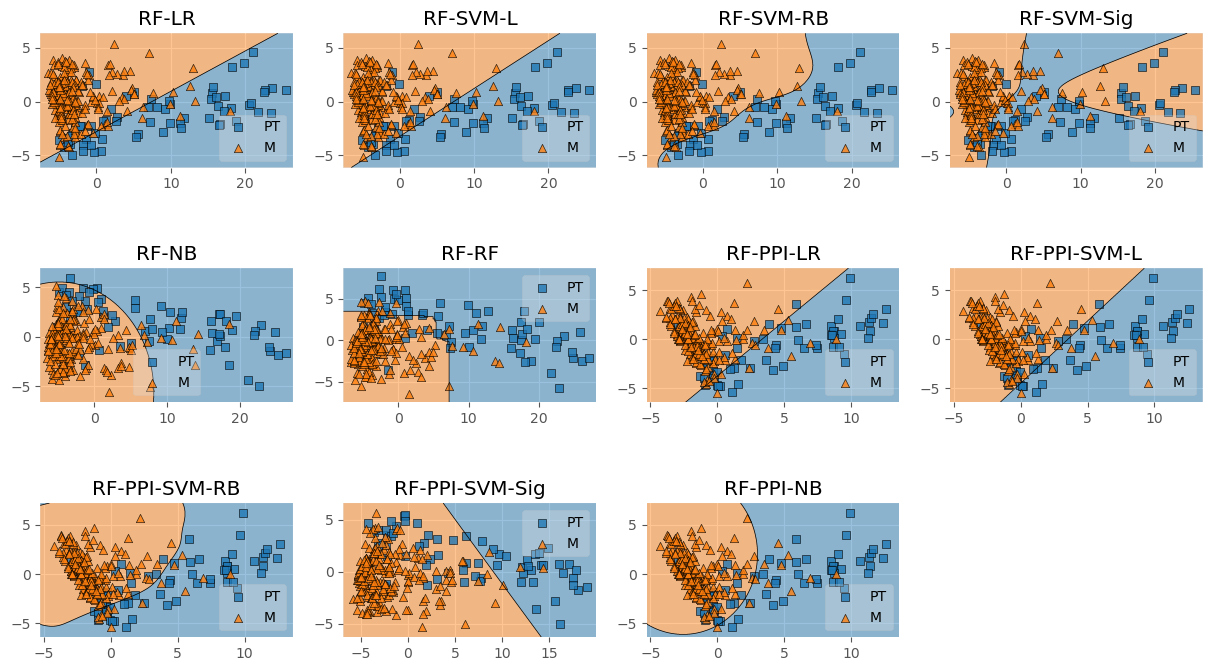

In [10]:
gs = gridspec.GridSpec(3, 4)
grids = list(itertools.product([0, 1, 2], [0, 1, 2, 3]))
grids.pop()

for model_prefix, n_gene, rf_technique, model_name, grd in zip(model_prefixes, 
                         model_n_genes,
                         rf_techniques,
                         model_names,              
                         grids):    
    
    if rf_technique:
        features = rf_features_df.weights.head(n_gene).index.values
    else:
        if n_gene == 0:
            features = ensemble_genes
        else:
            features = ppi_features_df.betweenness_centrality.head(n_gene).index.values

    model_classifier = ModelClassifier(
        train = train_df, 
        validation = test_df, 
        label = 'sample_type', 
        label_values = ['Primary Tumor', 'Metastatic'],
        features = features, 
        label_binarizer = False,
        log_transform   = True,
        log_transform_features = features
    )
    
    if n_gene == 0:
        clf =  joblib.load("../models/melanoma_ensemble_classifier.pkl")
    else:    
        clf =  joblib.load("../models/{0}{1}_genes_classifier.pkl".format(model_prefix, n_gene))
    

    pca = PCA(n_components = 2)
    X_train = pca.fit_transform(np.log(model_classifier.train_features + 1))

    clf.fit(X_train, model_classifier.train_labels)

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = X_train, 
                                y = model_classifier.train_labels.to_numpy(), 
                                clf=clf,
                  legend=2, ax=ax)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, 
          ['PT', 'M'], 
          framealpha=0.3, 
          scatterpoints=1)
    plt.title(model_name)
